## The N-Body Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import f90nml

In [2]:
def read_initial_conditions(file_path):
    with open(file_path, 'r') as file:
        # Read the first line to get dimensions and number of bodies
        first_line = file.readline().strip()
        n_dimensions, n_bodies = map(int, first_line.split())
        
        # Initialize lists to store masses, positions, and velocities
        masses = []
        positions = []
        velocities = []

        # Read the remaining lines to get initial conditions
        for line in file:
            values = list(map(float, line.split()))
            masses.append(values[0])
            positions.append(values[1:n_dimensions + 1])
            velocities.append(values[n_dimensions + 1:])
    
    return n_dimensions, n_bodies, masses, positions, velocities

### Results

In [3]:
# Read the namelist file
namelist = f90nml.read('namelist_nbody.nml')

# Extract the parameters
dt = namelist['inputs']['dt']
t_max = namelist['inputs']['t_max']
inits = namelist['inputs']['inits']
method = namelist['inputs']['method']

# Print the parameters
print(f"dt = {dt}")
print(f"t_max = {t_max}")
print(f"inits = {inits}")
print(f"method = {method}")

# File path to the inits.txt
file_path = f'{inits}.txt'

# Read the initial conditions
n_dimensions, n_bodies, masses, positions, velocities = read_initial_conditions(file_path)

# Print the results
print(f"Number of Dimensions: {n_dimensions}")
print(f"Number of Bodies: {n_bodies}")
print("Masses:", masses)
print("Positions:", positions)
print("Velocities:", velocities)

dt = 0.001
t_max = 10.0
inits = inits3
method = FE
Number of Dimensions: 2
Number of Bodies: 3
Masses: [1.0, 1.0, 1.0]
Positions: [[-1.0, 0.0], [1.0, 0.0], [0.0, 0.0]]
Velocities: [[0.464445, 0.39606], [0.464445, 0.39606], [-0.92889, -0.79212]]


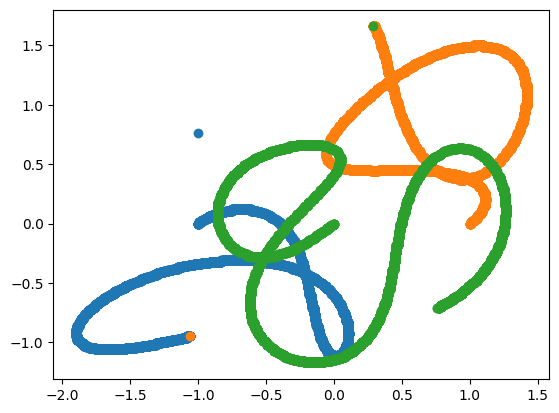

In [4]:
d = n_dimensions
k = int(t_max / dt)
n = n_bodies

for b in range(1, n+1):
    body = pd.read_csv(f'output/{method}{inits}_body{b}.csv', header=None).to_numpy().reshape(k, d)
    plt.scatter(body[:, 0], body[:, 1]) 

plt.show()


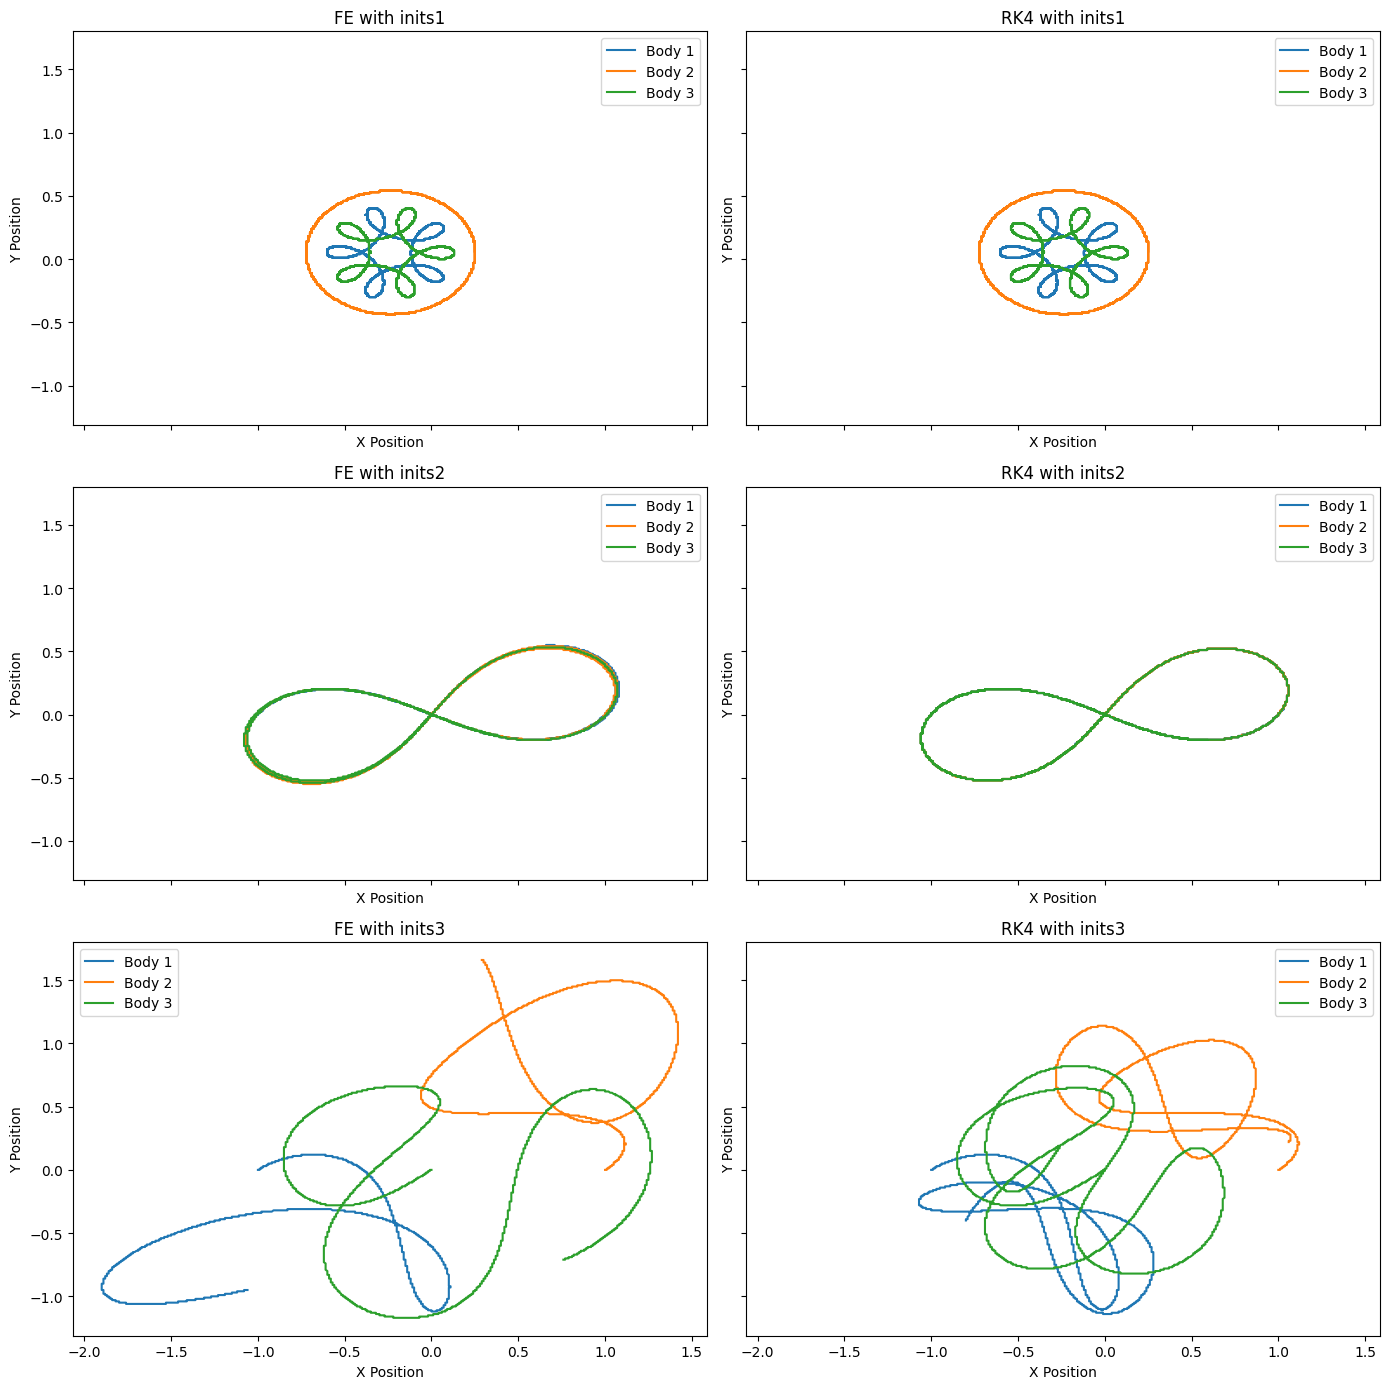

In [5]:
methods = ["FE", "RK4"]  # List of methods
initial_conditions = ["inits1", "inits2", "inits3"]  # List of initial conditions
d = n_dimensions
k = int(t_max / dt)
n = n_bodies

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(initial_conditions), len(methods), figsize=(14, 14), sharex=True, sharey=True)

# Loop over each initial condition and method
for i, inits in enumerate(initial_conditions):
    for j, method in enumerate(methods):
        ax = axes[i, j]  # Get the specific subplot
        for b in range(1, n+1):
            body = pd.read_csv(f'output/{method}{inits}_body{b}.csv', header=None).to_numpy().reshape(k, d)
            ax.plot(body[1:, 0], body[1:, 1], label=f'Body {b}')  # Use lines instead of scatter
        ax.set_title(f'{method} with {inits}')
        ax.set_xlabel('X Position')
        ax.set_ylabel('Y Position')
        ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()